## 가중치 초기화

적당한 위치에서 출발하여 제대로 최적해를 찾을 수 있기 위해선 적당한 위치를 찾는 것이 중요한데 우린 이것을 모델 초기화라고합니다. 가중치는 모델 파라미터에서 가장 큰 비중을 차지하기에 초기화 방식에 따라 성능의 차이가 생길 수 밖에 없습니다. 그래서 우리는 어떻게 초기화를 하는지를 알아야 잘 초기화하고 고성능 모델을 만들 수 있게 됩니다.

### 상수 초기화

최적해 정보가 없을 시 가장 간단하게 할 수 있는 방법은 임의의 상수로 초기화 시키기입니다.

#### 가중치를 0으로 초기화 

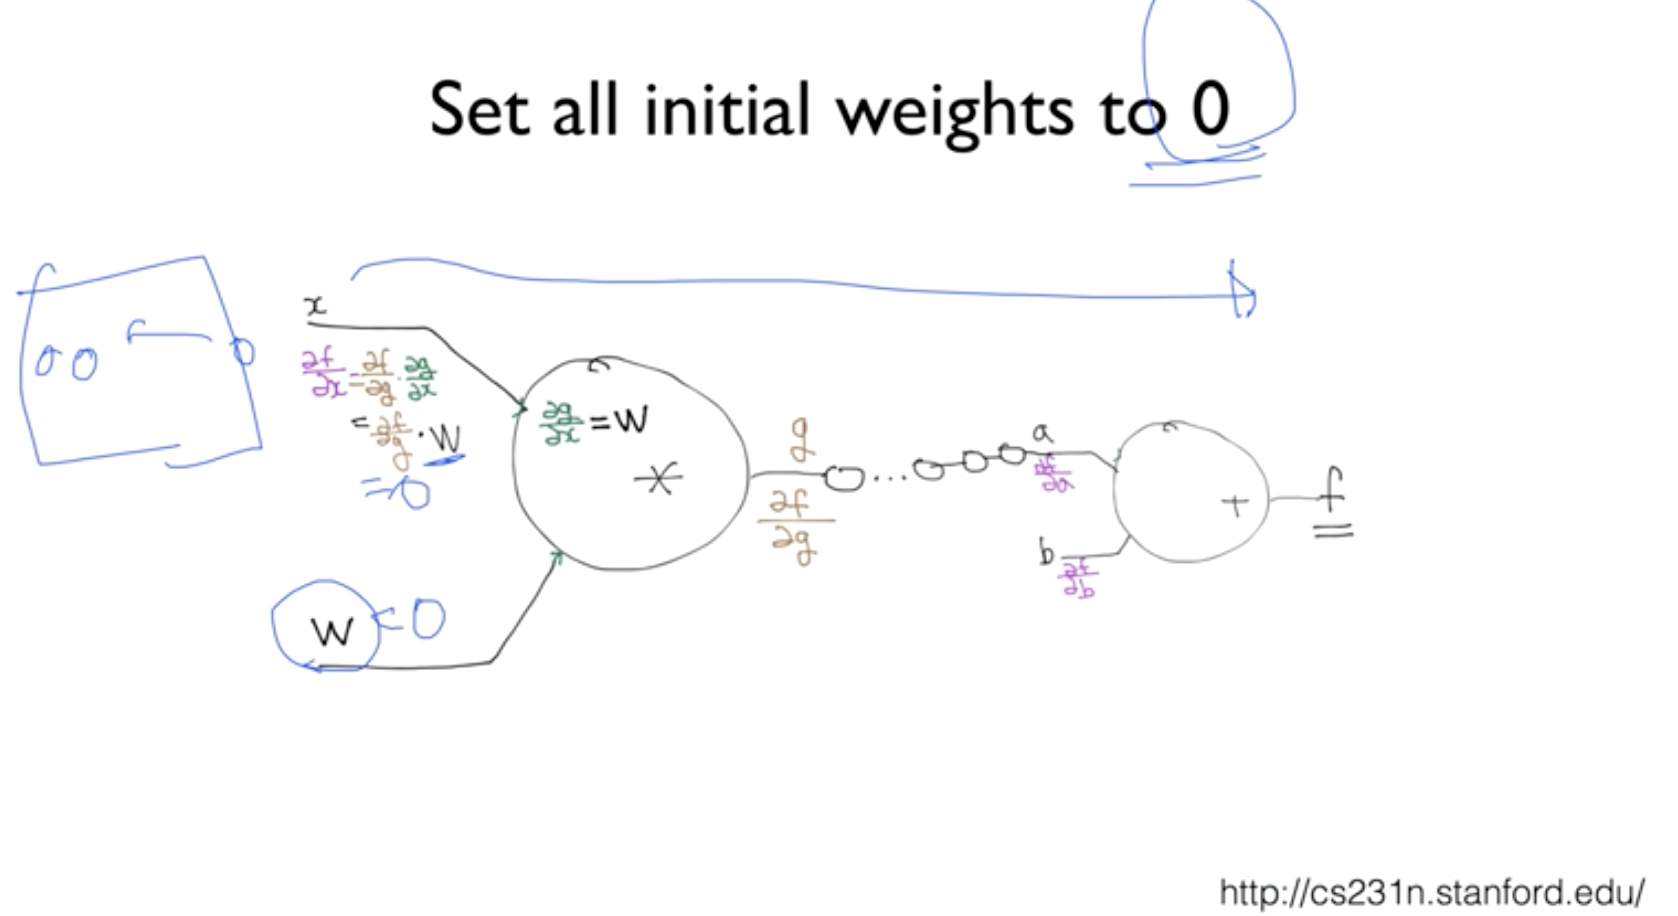

뉴런의 가중치가 0이면 당연히 합산 결과 또한 0이고, 활성함수는 0을 입력 받아서 같은 값만 출력한다. 이 출력값들은 의미가 없고 역전파도 이뤄지지 않아서 학습이 진행되지 않게 됩니다.

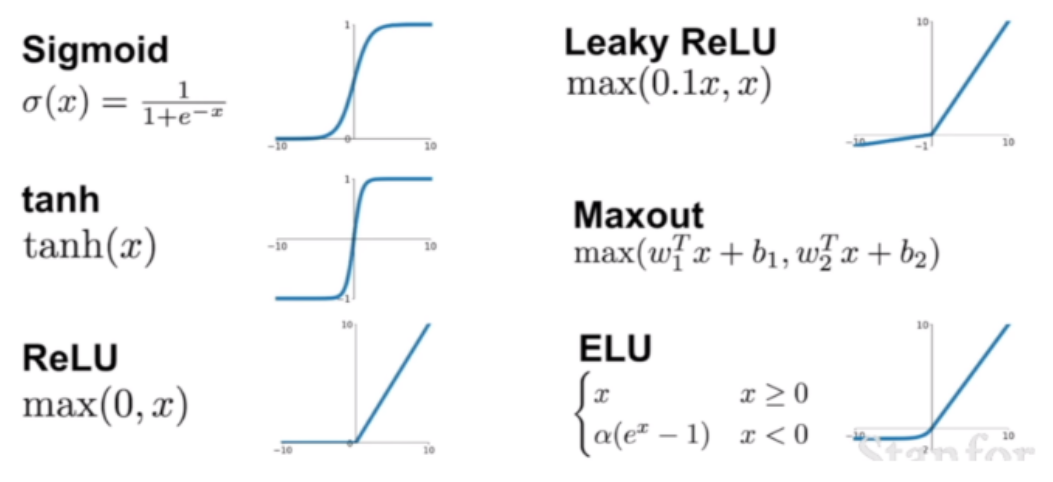

- 활성함수

   - ReLU의 출력: 0
   
   - 하이퍼볼릭 탄젠트 출력: 0
   
   - 시그모이드 출력: 0
   
   - 소프트맥스 : 모든 클래스의 확률이 동일해지니까 균등 분포를 출력한다
   

#### 가중치를 상수로 초기화

은닉 뉴런는 입력 값과 가중치 값이 같아서 가중 합산의 결과와 활성 함수의 실행 결과도 같게 된다. 그로 인해 뉴런의 갯수는 많더라도 신경망에 대칭성이 생겨서 실제로는 하나의 뉴런만 있는 것 같은 성능저하 효과를 불러일으킵니다.

### 가우시안 분포 초기화

대칭성을 피하려면 가중치를 당연히 다 다른 값으로 초기화를 시켜야하기에 가중치를 균등 분포나 가우시안 분포를 따르는 난수를 이용하면된다.

*근데 그냥 난수가 아닌 왜 분포를 따르는 난수를 이용할까?

이상한 숫자가 나와서 데이터를 망칠 수도 있기 때문일까? 이상치 방지용인가?

#### 가중치를 아주 작은 난수로 초기화

모델 가중치를 가우시안 분포 N(0,0.01)을 따르는 난수로 초기화 시, 계층이 깊어질수록 출력이 점점 0으로 수렴하게 됩니다. 가중치가 너무 작으면 뉴런의 출력이 작아지고 그로 인해서 입력 데이터가 여러 계층을 통과를 하면 할수록 0에 가깝게 변하게 되고, 이렇게 되면 가중 합산이 0이 되어서 가중치를 0으로 초기화하는 것과 같아지기에 의미있는 출력이 나오지도 못하고 학습 또한 진행이 되지 않습니다.


#### 가중치를 큰 난수로 초기화

반대로 가중치를 엄청 크게 키워서 가우시안 분포 N(0, 1)을 따른다면, 입력 데이터가 각 계층을 통과하면서 -1이나 1로 수렴하는 현상이 일어나고 이로 인해서 그래디언트가 0으로 포화되는 현상이 벌어져서 그래디언트가 소실이 생기게 되고 그로 인해 학습이 중단됩니다.

#### 적당한 가중치 값 찾기

여기서 우리가 궁금하게 되는 것은 어떻게 적당한 값을 찾을 수 있는지에 대한 고민이 필요합니다. 그러한 가중치는 입력데이터가 여러 계층을 통과해도 데이터의 크기가 유지될 수 있는 가중치로 초기화해야합니다. 그러면, 이제 어떻게 이것을 수행할 수 있을지 알아보겠습니다.

### Xavier 초기화

시그모이드 계열의 활성 함수를 사용해서 가중치를 초기화하는 방식으로 입력 데이터의 분산은 출력 데이터에서 유지되도록 가중치를 초기해야 데이터가 계층을 통과해도 같은 크기를 유지한다.


#### Xavier 초기화 방식의 가정사항

1. 활성 함수를 선형 함수로 가정한다

   - 입력 데이터가 0 근처 작은 값으로 지정하고 시그모이드 계열의 활성 함수의 가운데 부분을 지난다.
   
   - 시그모이드 계열 함수는 가운데 부분이 직선에 가깝기에 선형 함수로 가정이 가능하다
   
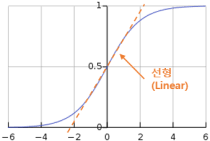


2. 입력에디어톼 가중치는 아래와 같은 분포 성질을 갖는다

- 입력 데이터(x1,x2,...,xn)와 가중치(w1,w2,..wn)는 서로 독립이다.

- 입력 데이터의 각 차원 xi는 같은 분포이고 서로 독립인 i.i.d를 만족한다

- 가중치의 각 차원 wi도 같은 분포이고 서로 독립인 i.i.d를 만족한다

- 각 xi와 wi(i=1,2,...,n)는 평균이 0인 분포를 따르고 E(wi)=0이고 E(xi) =0 이다

*각각의 random variable들이 독립 + 동일한 확률분포를 가지는 분포를 뜻

https://cyber0946.tistory.com/115


#### Xavier 초기화 식의 유도 과정

활성 함수로 선형 함수로 가정했기에 뉴런의 출력 y = 가중합산 z

- 두 번째 줄 성립 이유

https://datascienceschool.net/02%20mathematics/07.03%20%EB%B6%84%EC%82%B0%EA%B3%BC%20%ED%91%9C%EC%A4%80%ED%8E%B8%EC%B0%A8.html 


- 모든 xi와 wi는 같은 분포를 따르기에 분산이 같다.

-  Var(wi) = 1/n 이므로, 가중치의 분산 입력 데이터 개수 n에 반비례하도록 초기화를 하는 방식으로 볼 수 있고, 가중치 분포는 가우시안 분포 혹은 균등 분포로 정의가 가능합니다.

- 정리, Xavier 초기화를 이용해서 신경망 초기화 시, 입력 데이터가 계층을 여러 번 통과하여도 분산 유지가 잘 되고 출력값이 0으로 변하는 현상도 포화하는 현상도 일어나지 않아서 신경망의 학습이 진행이 된다.


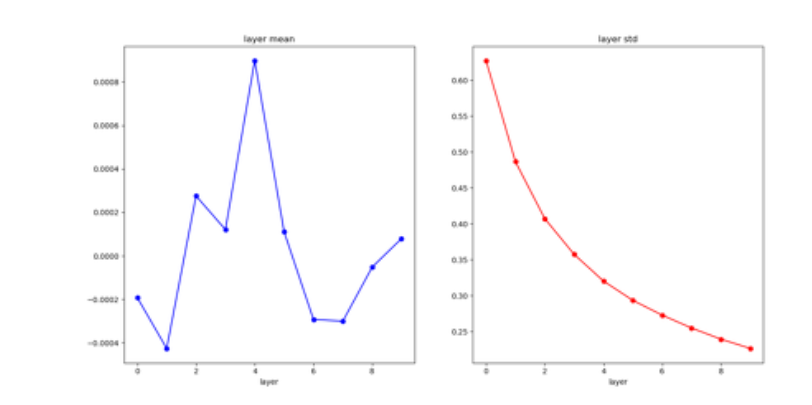

### He 초기화

활성함수가 ReLU일 경우 Xavier 초기화를 사용하지 못하게 됩니다. 그 이유는 Xavier 초기화는 시그모이드 계열 함수를 위해서 만들어졌기 때문입니다. 그렇다고 ReLU를 버릴 순 없습니다. 그래서 Xavier초기화의 한계점인 ReLU함수를 쓰지 못한다는 것을 해결하기 위해서 He 초기화가 나왔습니다.

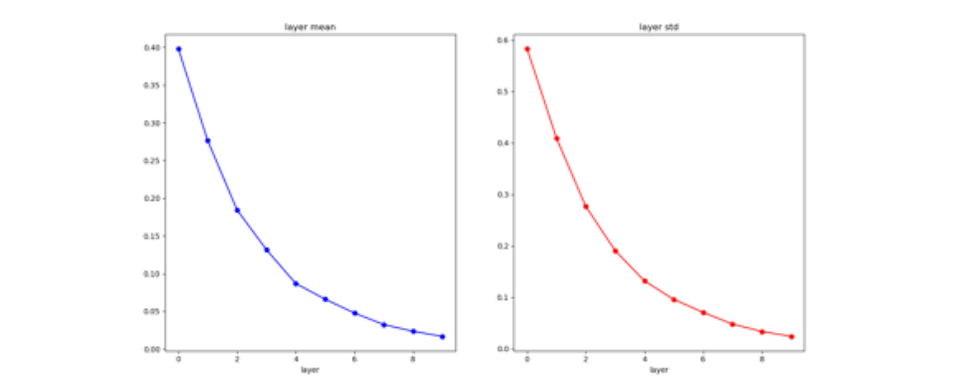

He초기화도 뉴런의 입력 데이터와 출력 데이터의 분산을 같게 만들어주지만 ReLU사용 시 출력 분산이 절반으로 줄어드는 현상을 해결하기 위해서 가중치의 분산을 2/n으로 한다. ReLU의 특성 때문에 데이터가 0으로 몰려 있지만 양수 구간에서 데이터는 고르게 퍼져있습니다.

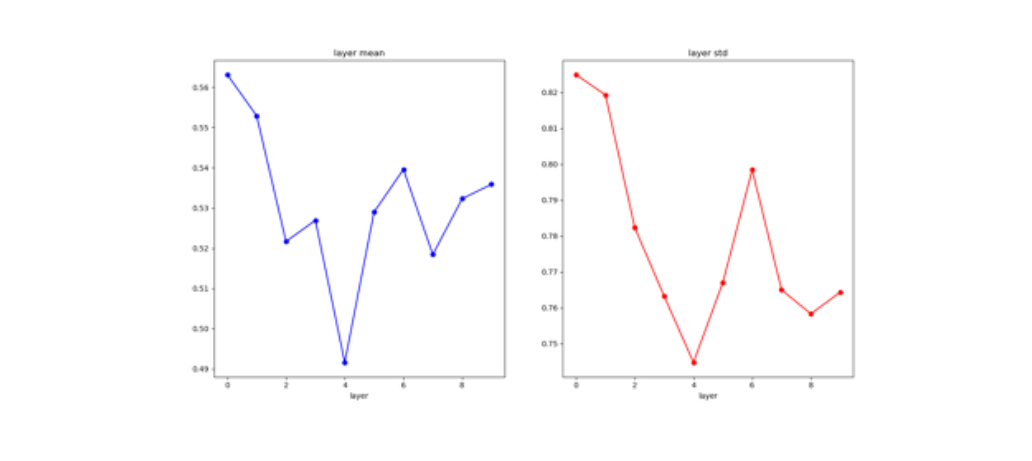

*출력 분산이 절반으로 줄어드는 이유는 ReLU는 음수 영역을 쓰지 못하기 때문입니다.

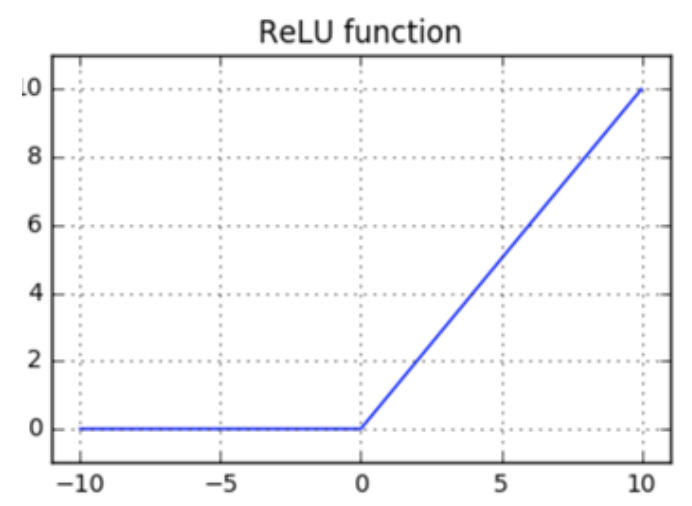

## 정규화

최적화 과정에서 최적해를 잘 찾도록 정보를 추가하는 것으로 성능 개선하는 방법들을 포괄하는 것으로 모델이 크고 복잡하게 되면 파라미터 공간이 커지게 되고 그로 인해 학습 데이터가 많이 필요합니다. 이때, 정규화 기법을 쓰지 않으면 과적합이 되기에 적절하게 잘 사용해야합니다.

1. 최적해가 어느 공간에 있는지 알려줌

2. 손실함수를 부드럽게하여 최적해로 가는 길을 닦아줌

3. 최적해 주변을 평평하게하여 새로운 데이터가 들어와도 성능 좋게 하도록 만들어 준다.

4. 모델과 데이터에 확률적 성질 부여를 통해서 조금씩 다르지만 다양한 상황에 학습이 가능하도록 도와줌


### 일반화 오류

일반화는 모델 성능이 좋다는 의미로 훈련 데이터가아닌 새로운 데이터에 대해 모델 예측이 얼마나 잘되는지를 가리킵니다. 일반화의 오류는 모델의 훈련 성능과 검증/테스트 성능의 차를 말하는 것으로 당연히 오차가 적을 수록 일반화가 잘된 모델이다. 물론, 검증/테스트 성능은 훈련 성능보다 낮을 수 밖에 없지만, 두 성능의 차이가 작아야 과적합되지 않고 새로운 데이터도 잘 처리하는 모델이 만들어집니다. 그래서 정규화는 일반화를 잘하는 모델을 만드는 기법이라고 합니다. 

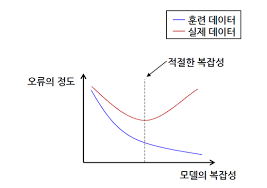


### 정규화 접근 방식

1, 모델을 최대한 단순하게 만든다

   - 모델이 복잡할 수록 당연히 과적합이 잘 생기기 때문이다.

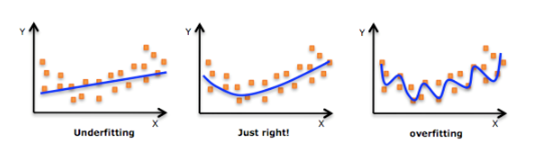

2. 사전 지식을 표현해서 최적해를 빠르게 찾도록 한다.

   - 모델 사전 분포를 이용해서 찾기
   
   - 사전 지식: 전이 학습, 메타학습같이 파라미터 초기화하여 세부 튜닝하는 학습방법
   
 3. 확률적 성질 추가(= 데이어테 랜덤성 추가)
 
    - 데이터,모델, 훈련기법 등에 추가하면 조금씩 변형된 형태가 되어서 이러한 것들을 처리하면 다양한 상황에서 학습을 할 수 있는 효과를 준다.
    
    - 손실함수는 풍부한 데이터를 이용하게 되니 넓은 범위에서 세밀하게 표현이 가능하니까 정확한 해를 찾을 수 있고 모델 노이즈에 민감하게 반응을 하지 않게 된다
    
    
 4. 여러 가설을 고려하여 예측한다.
 
    - 하나의 모델을 예측하지 않고 여러 모델로 동시에 예측하여 결과에 따른 최종 예측하는 방식
    
    - 여러 모델예측으로 인해 편향성을 제거하고 오차를 최소화하여 공정하게 예측가능
    

## 배치 정규화

신경망 학습이 어려운 이유는 계층을 지날 때마다 데이터가 조금씩 왜곡이 되는 현상이 벌어지기 때문입니다. 그래서 가중치 초기화를 잘하고 학습률을 작게 사용해야 데이터 왜곡을 막을 수 있는데 그렇게 되면 학습 속도가 느려지는 문제가 생깁니다. 정말 어렵지만 데이터 왜곡은 해결해야하는 문제입니다.

### 내부 공변량 변화

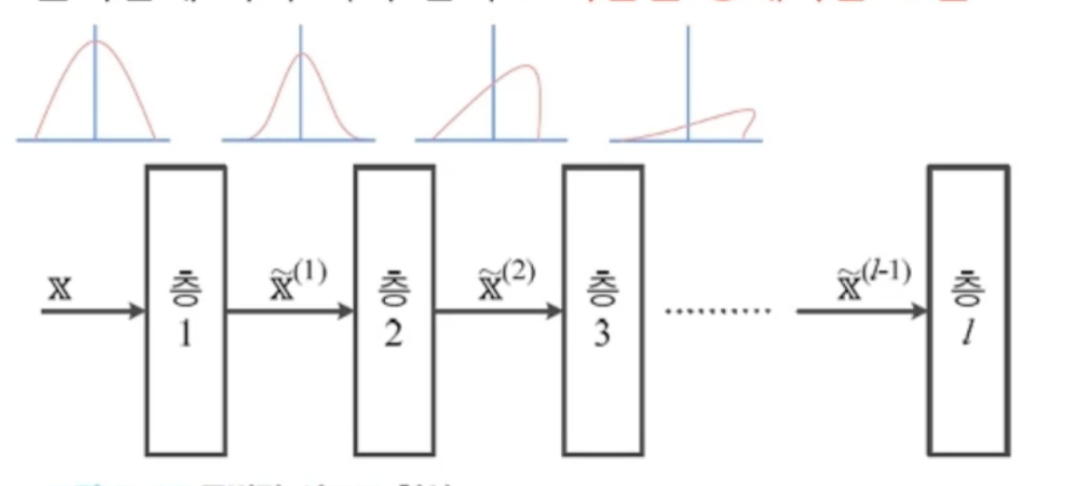

내부 공변량변화는 데이터 분포가 보이지 않은 요인(= 내부 공변량)이 바뀜으로 인해서 가중치 값이 바뀌고 그로 인해 데이터 왜곡이 되어버리는 현상을 뜻하고, 그로 인해 각 계층의 분포가 원래 분포보다 멀리 떨어지게 됩니다. 그래서, 하위 계층의 작은 변화가 상위계층까지 영향을 미치게 됩니다. 즉,  학습 과정에서 각 층 별로 입력 데이터 분포가 달라지는 현상입니다.

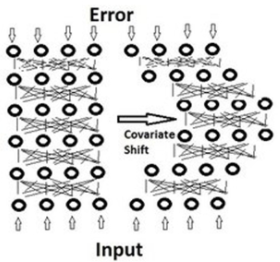

### 배치 정규화 단계

배치 정규화는 데이터가 계층을 지날 때마다 매번 정규화해서 내부 공변량 변화를 없애는 방법으로 기존 정규화와 다르게 모델을 한꺼번에 하지 않고 계층형 형태로 실행하여 매번 데이터별로 정규화가 일어나기에 데이터 왜곡을 방지하죠. 

#### 표준 가우시안 분포로 정규화

d차원의 입력데이가 들어오면 배치 정규화로 차원별 평균과 분산을 구한 후에 가우시안 분포 N(O,1)로 정규화하는 방식으로 데이터가 작아지면 내부 공변량의 변화도 작게 만들 수 있습니다.

수식: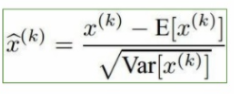

배치 정규화를 모든 계층에 적용하면 데이터가 지날 때마다 표준 가우시안 분포로 바뀌고 그에 따라 내부 공변량의 변화를 최소화하여 오차의 크기가 줄어들뿐만 아니라 누적 오차도 작게 한다.

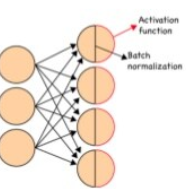

#### 원래 분포로 복구

데이터를 가우시안 분포로 정규화하면 모델이 표현하고 싶은 비선형성을 제대로 파악을 할 수 없게 됩니다. 예를 들어, 활성함수가 시그모이드인 경우 정규화된 데이터는 시그모이드의 가운데 부분인 선형 영역을 통과하게 되어 비선형성이 사라지게 된다. 하나 더 예시를 들자면, ReLU일 경우 표준 가우시안 분포로 정규화된 데이터의 절반은 음수이고 절반은 양수가 되어 데이터 출력이 0이되게 되므로 뉴런의 절반이 죽어서 학습이 이뤄지지 않는다. 이러한 이유들 때문에 배치 정규화 후에 모델의 비선형성을 살리기 위해서는 데이터를 표준 가우시안 분포로 정규화를 한 후에 원래 데이터로 복구 해야한다. 데이터를 복구할 때는 평균과 표준펴차는 모델의 학습과정에서 따로 구해야한다.

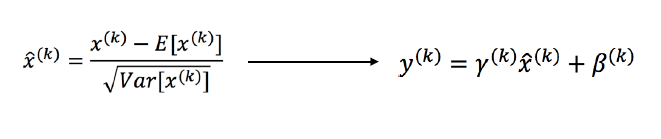


### 배치 정규화 알고리즘

배치 정규화의 알고리즘은 미니배치 평균과 분산을 구한 후 표준 가우시안 분포로 정규화를 진행합니다 그 후에 학습된 평균과 표준편차을 이용하여 원래 분포로 복구한다. 단계별로 다시 이야기를 하면, 학습 단계에서는 미니배치 단위의 평균과 분산으로 정규화를 수행하고 테스트 단계에서는 전체 데이터의 평균과 분산으로 정규화합니다.

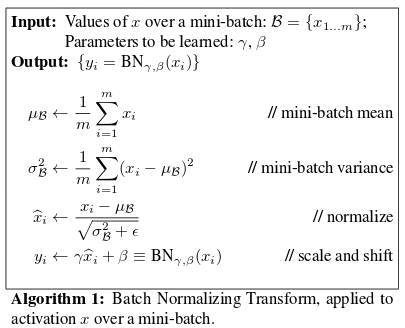


#### 배치 정규화 수행 위치

처음에는 뉴런의 가중 합산과 활성함수 사이에서 하는 것을 제안했으나 실제로 연구를 했을 땐 그리 효과를 주지 못했습니다. 그래서 활성함수 실행 후 배치 정규화를 하는 것이 더 성능이 좋습니다.

### 이미지 정규화 기법

배치 정규화를 이미지에 적용할 때 채널 단위로 정규화를 조금 더 세분화된 방식으로 사용합니다. RNN에서는 계층 정규화를 사용하는데 이 기법은 이미지 샘플별로 정규화 하는 방식으로 미니배치 크기와 무관한 특징을 갖고 있습니다. 스타일 변환이나 GAN에서는 인스턴스 정규화를 사용하고, 이는 샘플의 채널별로 정규화하는 것을 의미합니다. 만약 미니 배치 크기가 작을 경우는 샘플의 채널 그룹을 나눠서 정규화하는 방식인 그룹 정규화를 사용합니다.

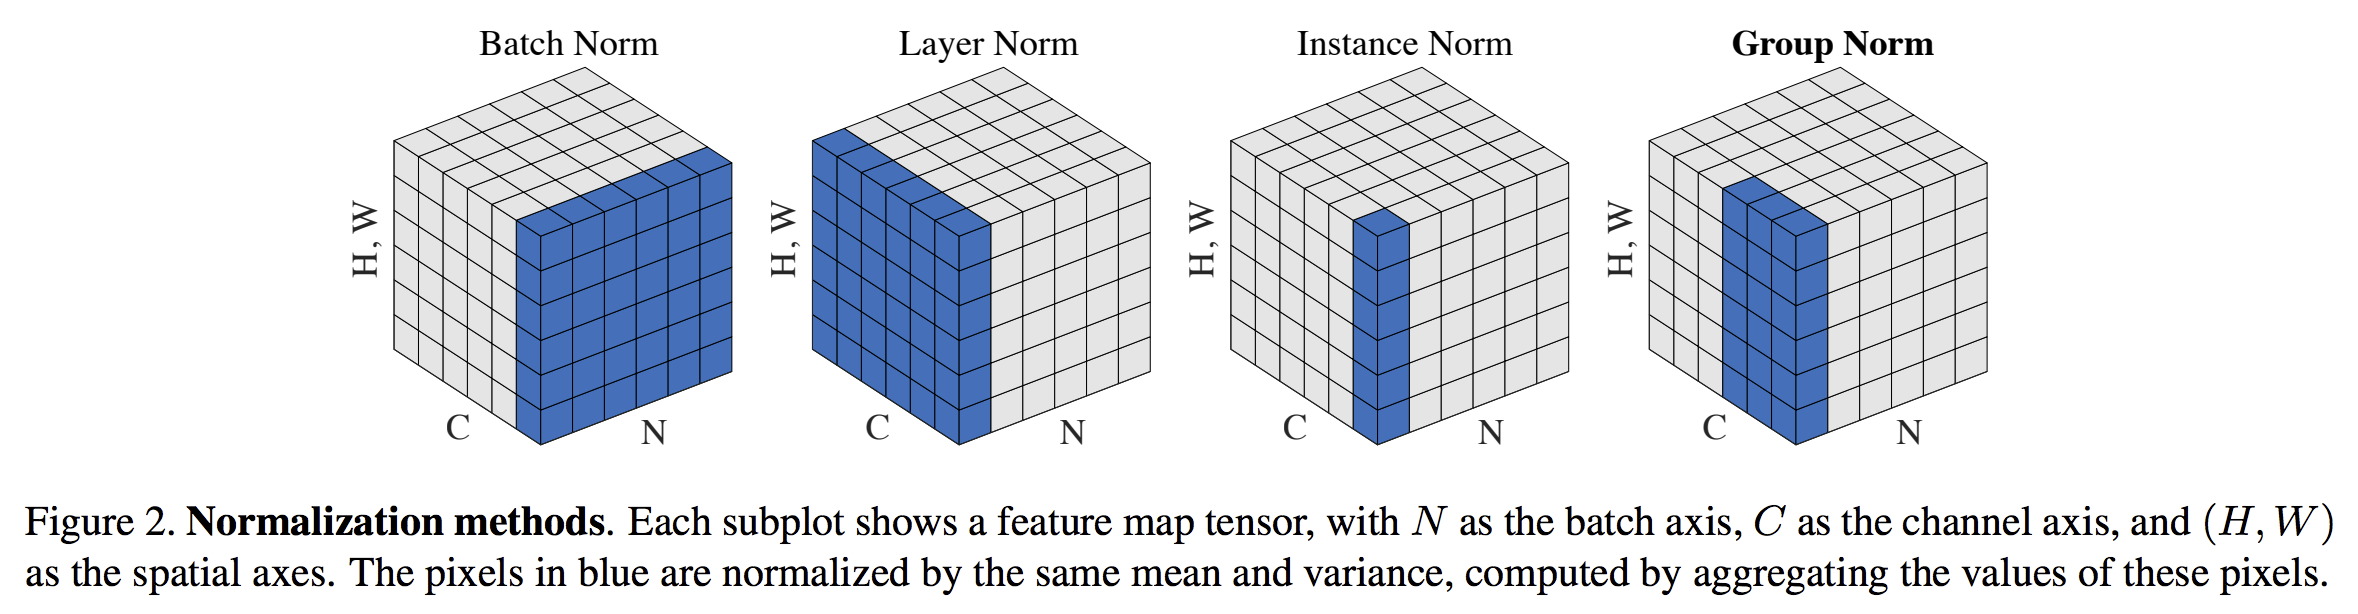


### 배치 정규화의 우수성

1. 내부 공변량 변화가 최소화가 되어서 그레이디언트의 흐름이 원활해져서 학습이 안정적으로 진행됨

2. 지속적으로 데이터 분포 유지로 인해서 초기화 방법에 대한 의존도가 감소되기에 높은 학습률 사용 가능

3. 미니배치 단위로 정규화하기 때문에 확률적 성질이 생겨서 데이터가 변화되고 그로 인해 모델 성능 향상

4. 손실과 그레이디언트 변화를 제약하여 곡면이 부드러워지고 이로 인해 모델의 학습 성능이 향상됨


## 가중치 감소

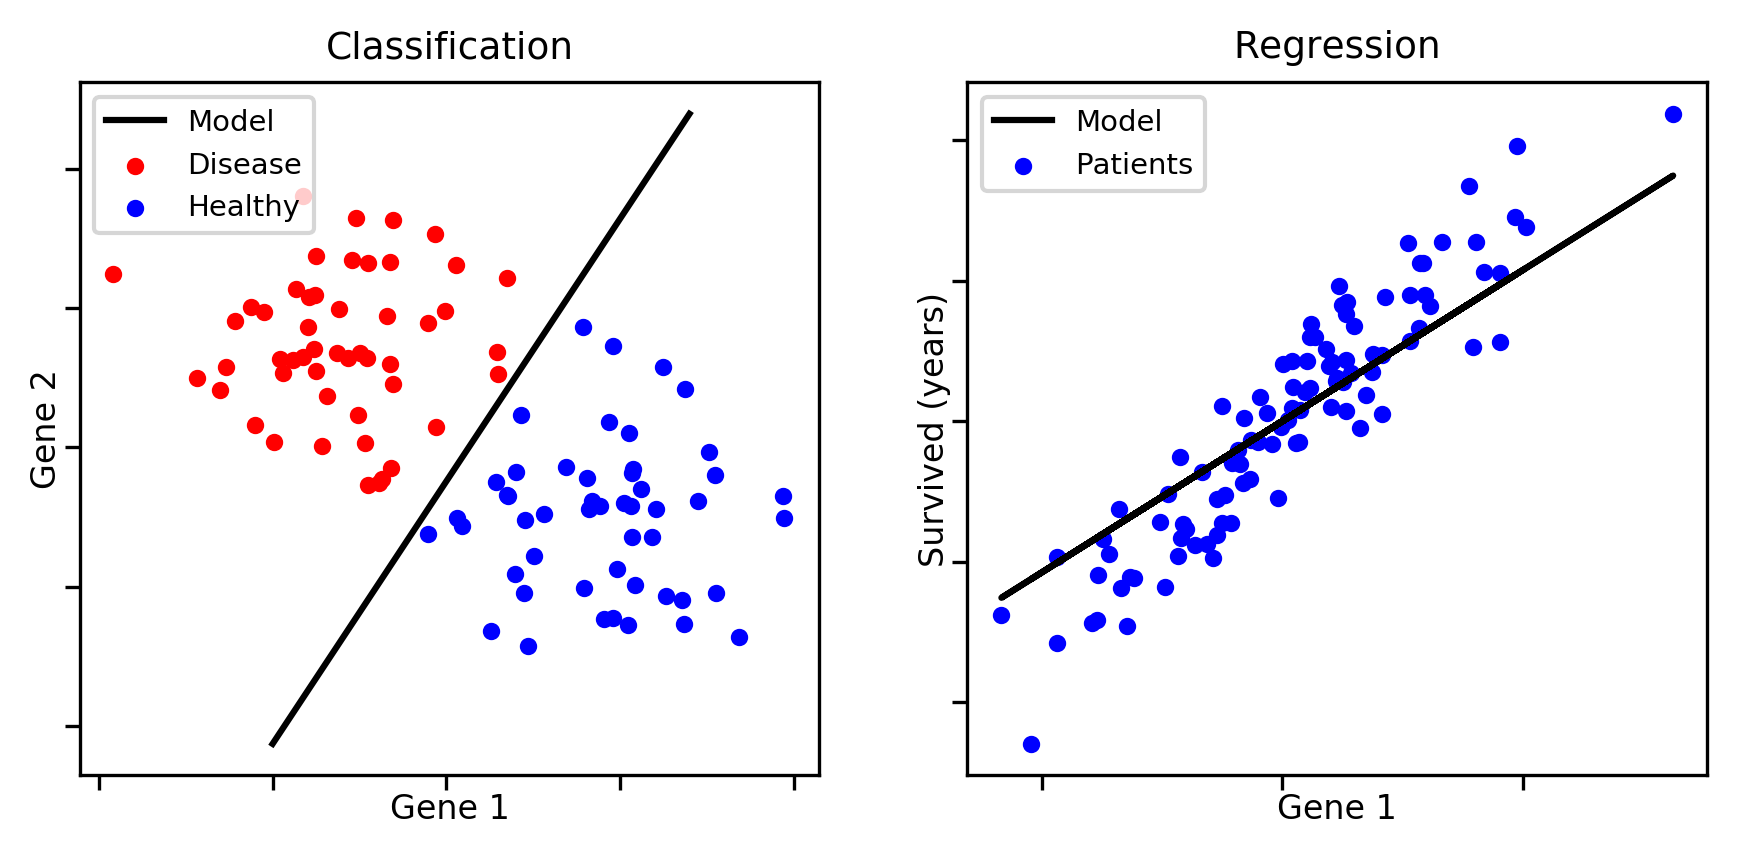

직선의 방정식 w^Tx + b = 0인 식을 표현할 때 가중치와 편향이 작은 것이 좋으므로, 가중치 감소는 학습 과정에서 작은 크기의 가중치를 찾게 만드는 정규화 기법이다.

### 가중치 감소 적용 방식

가중치 감소는 가중치의 크기를 제한하는 제약 조건으로 손실 함수의 일부 항을 표현할 수 있는데, 손실 함수에 정규화 항을 추가하면, 최적화 과저에서 같이 작아지므로 크기가 작은 가중치 해를 구할 수 있습니다.

수식: 확장된 손실 함수 = 손실함수 + 정규화항이다.정규화 항에는 가중치 크기를 조절하는 정규화 상수가 있는데 이 상수가 커질수록 정규화의 비중이 커지고 가중치의 크기는 작아지고 상수가 작을수록 정규화 비중이 작아지고 가중치의 크기는 커지므로 이 상수의 값에 따라 유효한 가중치의 개수가 달라질 수 있게 되어 모델의 복잡도를 조정하는 역할을 한다.

정규화 항은 가중치의 크기를 나타내는 노름으로 정의가 되고, L2노름을 사용하면 L2정규화이고 L1노름을 사용하면 L1정규화 라고 합니다. 더 나아가 회귀 문제에서는 각각 리지 회귀와 라소 회귀로 부른다.


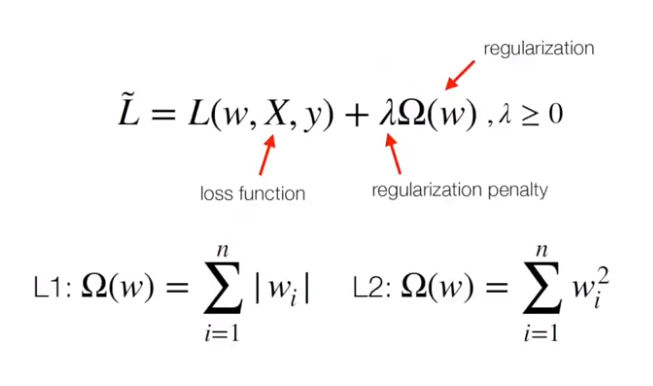

만약, 가중치 그룹별로 크기 조절을 하고 싶다면 가중치 그룹 wi별로 정규화 항을 분리해서 합산의 형태로 표현합니다. 신경망의 계층별로 가중치 크기가 다를 때 통제할 수도 있다.

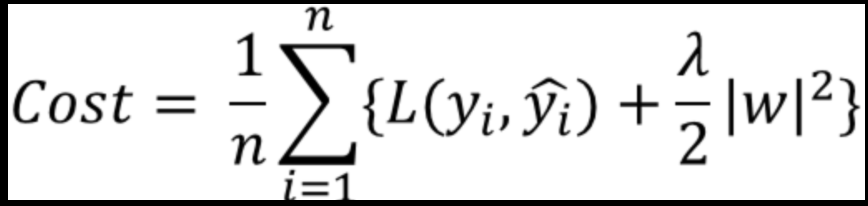

### 기증치의 사전 분포와 노름

가중치의 사전 분포에따라 L1 노름을 사용할지 L2노름을 사용할지 결정할 수 있고, 사전분포가 가우시안 분포라면 L2노름이고 라플라스 분포이면 L1을 사용하는데 사전 분포를 모를 경우 보통 L2사용한다.

*가우시안

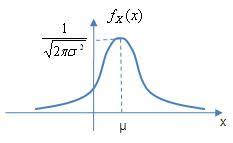

*라플라스 변환

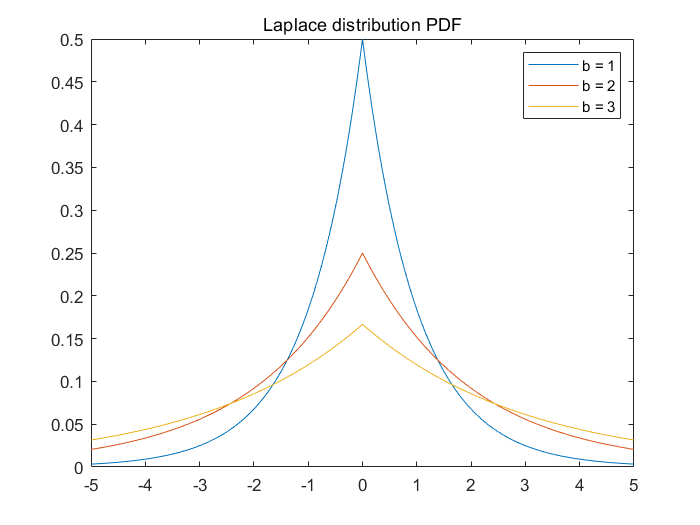


#### 가중치 감소 정규화 항의 노름 유도 과정

정규화 항은 손실 함수의 일부로 최대 우도 측정 방식을 따르는데 가중치의 사전 분포에 음의 로그 우도를 구해서 표현할 수 있다.

*다변량 가우시안 분포 수식

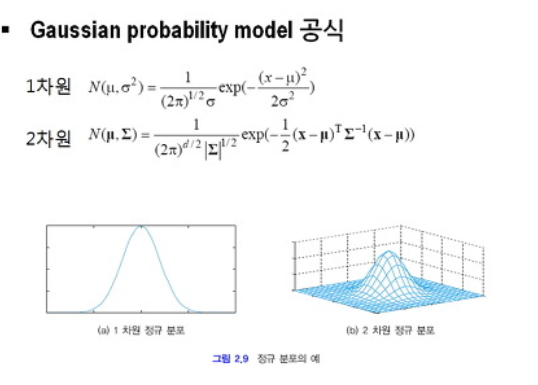

가중치의 사전 분포가 가우시안 분포 N(w|0,I)이고 w가 D차원이면 음의 로그 우도를  취할 때, 가중치의 L2노름의 제곱 도출

수식: - logN(w|0,I) = 0.5||w||2 + const

가중치의 사전분포가 라플라스 분포라면 음의 로그 우도를 취하면 L1 노름으로 유도가 됩니다.

수식: - logf(w|0,I) = ||w|| + const


### 정규화 효과

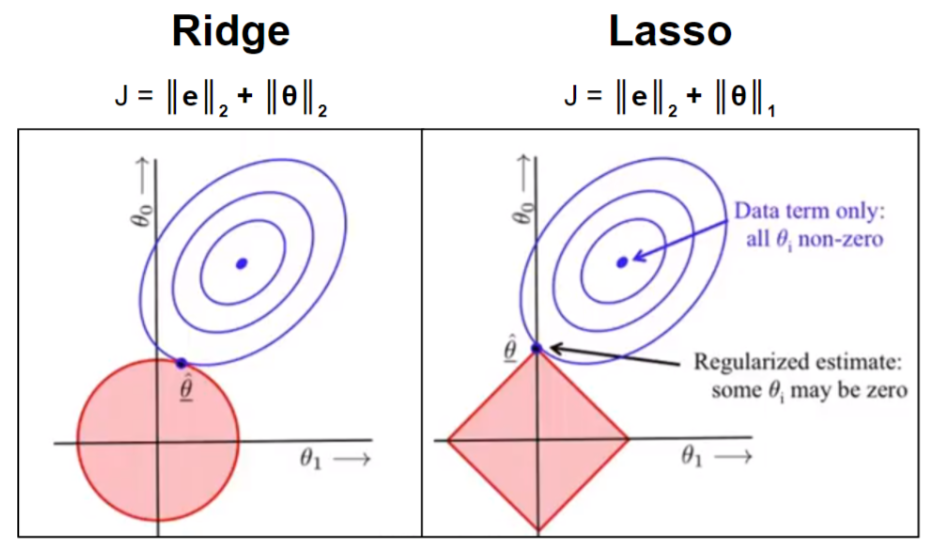

접점이 가중치 감소를 적용한 확장된 손실 함수의 해가 된다.

L2 정규화의 경우 손실함수 J(w)가 어느 방향에 있던 손실함수, J(w)가 닿을 확률은 같기 때문에 최적해는 원점 주변에 존재한다. 

L1 정규화의 경우 손실함수 J(w)가 다이아몬드 모서리에 먼저 닿을 확률이 더 높기에 최적해가 특정 차원 축에 있을 가능성ㅇ이 높다. 좌표 대부분이 0으로 채워진 희소한 해를 갖고 이로 인해 유효 파라미터 수가 줄어서 작은 모델이 되게 되어 성능이 빨라지고 Selection과정으로 볼 수 도 있다.

## 조기 종료

조기 종료는 모델 과적합되기 전에 훈련을 멈추는 정규화 기법입니다.

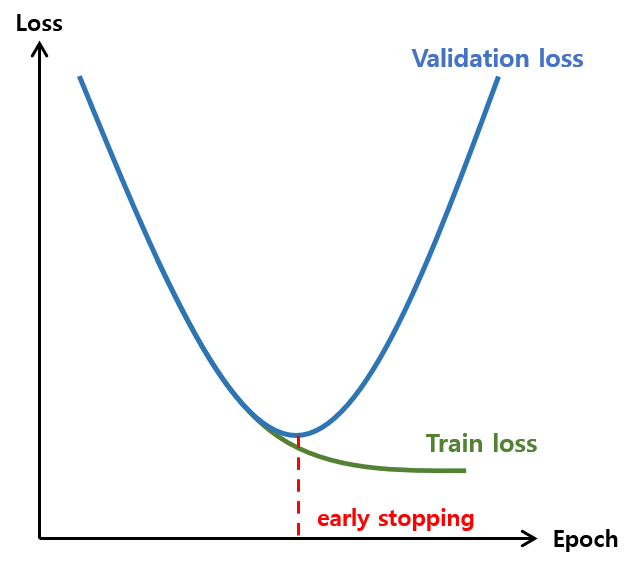

### 조기 종료 기준

1. 모델 성능이 향상되지 않더라도 바로 종료를 하면 안된다. 

2. 일정 횟수동안 성능이 연속으로 좋아지지 않으면 그때 훈련 종료 시키기

3. 모니터링 회수는 충분히 크게 정하기

4. 기준은 모델의 오차, 정확도 같은 성능 기반으로 사용한다.


### 조기 종료의 정규화 효과

조기 종료는 파라미터 공간을 작게 만드는 효과가 있다 왜냐하면 최적화 스텝 수와 학습률 크기의 반경을 갖는 공간에서만 움직일 수 밖에 없기 때문입니다.


#### 조기 종료와 L2 정규화의관계
조기 종료로 파라미터 공간의 크기가 제약이 되어 L2정규화와 동일한 효과있다. 왜냐하면, 손실 함수와 정규화 항이 만나는 지점이 비슷한 위치이기 때문이고, 손실함수가 2차 함수로 정의되는 선형 모델의 경우 조기 종료와 L2 정규화가 동일하는 것을 증명함


## 데이터 증가

모델은 복잡하지만 충분한 데이터가 없으면, 모델이 데이터를 암기하여 과적합이 생기는 것으로 이 과적합을 막으려면 근본적으로 훈련 데이터의 양을 늘리면 되는 것이다.

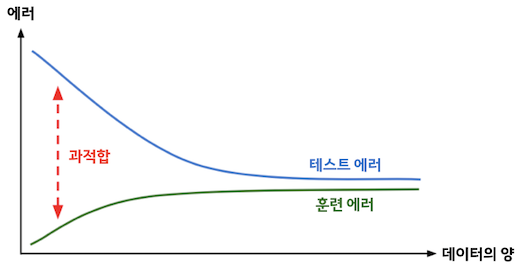

데이터를 많이 수집하면 되겠지만 현실에선 여러 제약으로 인해서 데이터 수집보단 훈련 데이터셋을 이용하여 새로운 데이터를 생성하는 데이터 증강기법을 이용합니다

### 데이터 증가 기법

1. 기본적인 방식은 훈련 데이터를 조금 변형해서 새로운 데이터를 만드는 것이다

2.  GAN을 이용하여 생성 모델을 만들고 새로운 데이터 만드는 방식도 있다



#### 데이터 증강은 어떤 방식으로 실행해야 하나?

물론, 미리 만든 후에 훈련 데이터 셋에 추가할 수 있지만 그렇게 하지 않고 훈련 과정 속에서 실시간으로 데이터를 증강시킨다. 왜냐하면, 데이터를 확률적으로 변형하면 무수히 많은 변형을 생기게 할 수 있기 때문이다.

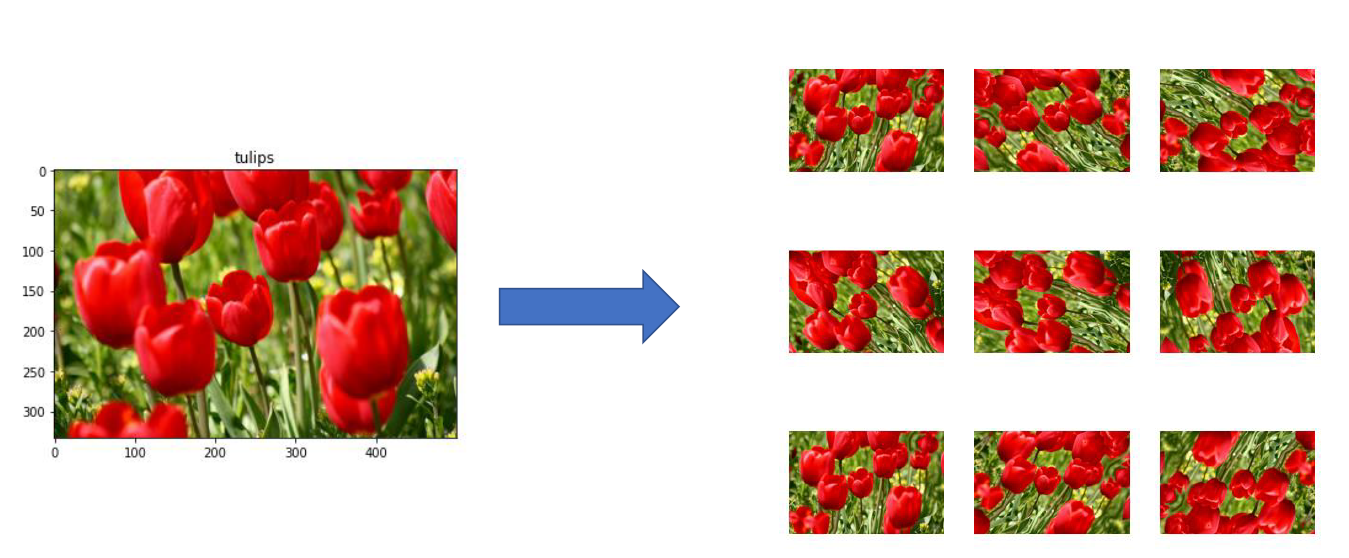


### 클래스 불변 가정

클래스 불변 가정은 데이터를 증강시켜도 클래스는 바뀌지 않아야한다. 왜냐하면 클래스 결정 경계를 넘어가면 다른 클래스로 인식이 되기 때문에 각자의 결정 경계 안에서 데이터 변형을 해야한다.

### 데이터 증강 방식 선택

이미지를 변형하는 방법은 너무나 다양해서 데이터의 종류와 문제에 따라서 데이터 증강 방식이 다르다. 그래서 최근 연구에서는 데이터 증강 방식을 자동으로 찾아주는 자동 데이터 증강 기법이 연구되는 중이다. 이를 통해서 모델의 성능을 최대화하는데 필요한 데이터 증강 정책을 강화학습이나 진화 알고리즘이용하여 생성한다.


## 배깅

앙상블은 여러 모델을 실행하여 하나의 강한 모델을 만드는 방법으로 개별 모델의 성능은 약할지 몰라도 약한 모델이 모여서 원팀을 이루면 강해지듯이 합치면 성능이 좋은 모델이 될 수 있다. 배깅은 앙상블의 종류 중 하나로, 독립된 여러 모델을 동시에 실행 후 개별 모델의 예측을 통해서 최종으로 예측하는 것이고, 또한 배깅은 정규화 방법으로도 불리는데 그 이유는 모델이 서로 독립일 때, 예측 오차가 모델 수에 비례해서 줄어든다.

### 배깅의 원리

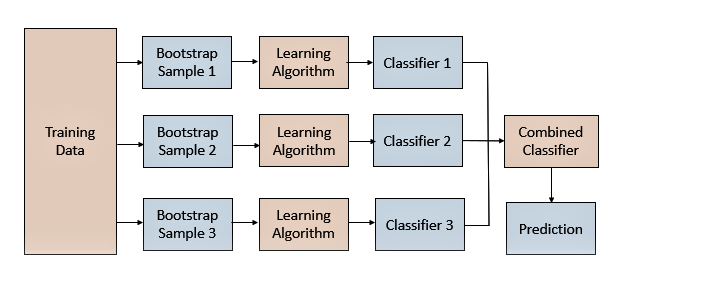

배깅은 모델의 종류와 상관없이 팀을 구성할 수 있지만 성능을 높이려면 모델의 독립성을 보장해야합니다.  그래서 부트스트랩기법을 훈련 데이터에 이용하면 모델별로 데이터를 생성하기 때문에 모델의 독립성을 보장한다. 부트스트랩 데이터는 훈련 데이터에서 복원추출해서 훈련 데이터와 같은 크기로 만듭니다.

*독립성이 강할수록 모델의 성능이 증가하나요? 독립성이 강하다는 것은 서로 다른 데이터가 많다라고 이해해도 되나요? 서로 다른 데이터로 학습할수록 모델의 성능은 좋아지니까요.!

*복원추출을 이용하면 크기가 같아지나?

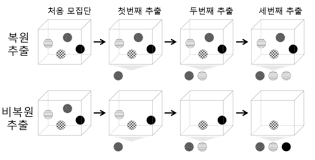

#### 여러 모델의 추론 결과를 이용한 배깅의 추론 방식

추론 단계에서는 개별 모델의 결과를 집계해서 예측을 합니다.

회귀 모델, 개별 모델 경과를 평균 내서 예측을 하기도하고, 상황에 따라 모델의 비중을 다르게두어 가중합산도 한다

분류 모델, 가장 많이 나온 값을 예측하는 다수결 투표 방식으로 사용하기도하고, 개별 모델을 임의로 선택하여 예측하거나 투표 방식 변형해서 사용하기도 함.


#### 신경망 모델로 배깅할 때 다른 점

신경망 모델 배깅 시 부트스트랩을 사용하지 않는다.

모델의 가중치를 랜덤하게 초기화하기 때문에 다른 모델인 것 같은 효과가 생긴다.

미니배치 방식을 통해 모델별로 다른 훈련 데이터셋 사용하는 효과 생김.

인공 신경망 모델은 다른 모델에 비해 앙상블 크기가 20이 넘으면 안된다.

#### 부스팅

부스팅은 앙상블 기법 중 하나로 모델을 순차적 실행하면서, 만약 이전 단계에서 잘못 예측된 샘플이 있다면 샘플의 가중치를 높여서 다음 단계에서 교정을 하는 방식이고, 최종 결과를 예측할 때는 각 단계의 결과를 가중합산한다. 이를 통해서 큰 모델을 만드는 방식이다.

### 배깅의 정규화 효과

배깅의 정규화 효과를 확인하기 위해서는 개별 모델의 예측 오차가 어떻게 줄어드는지 봐야합니다.

예를 들어, 회귀모델 k개를 배깅하고 개별 모델의 예측오차(a)는 평균이 0이고 분산이 v이며 모델 간의 공분산이 c인 가우시안 분포를 따르게됩니다.

a ~ N(0, 시그마)(i=1,2,...k)

E(a^2)=v, E[aa]=c

즉, 배깅의 예측은 개별 모델의 평균으로 계산이 되므로 배깅의 오차(b)는 개별 모델 오차의 평균이 된다.

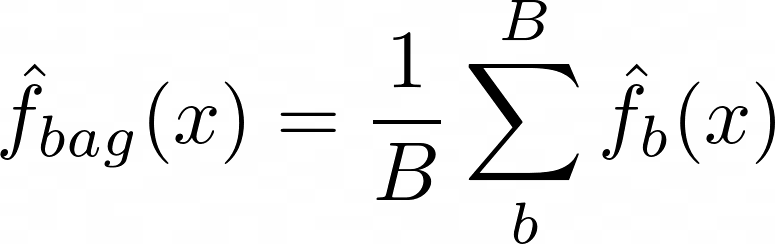

#### 배깅의 오차 크기

오차의 분산을 통해서 오차가 줄었는지 확인합니다. b의 평균은 0이다. 

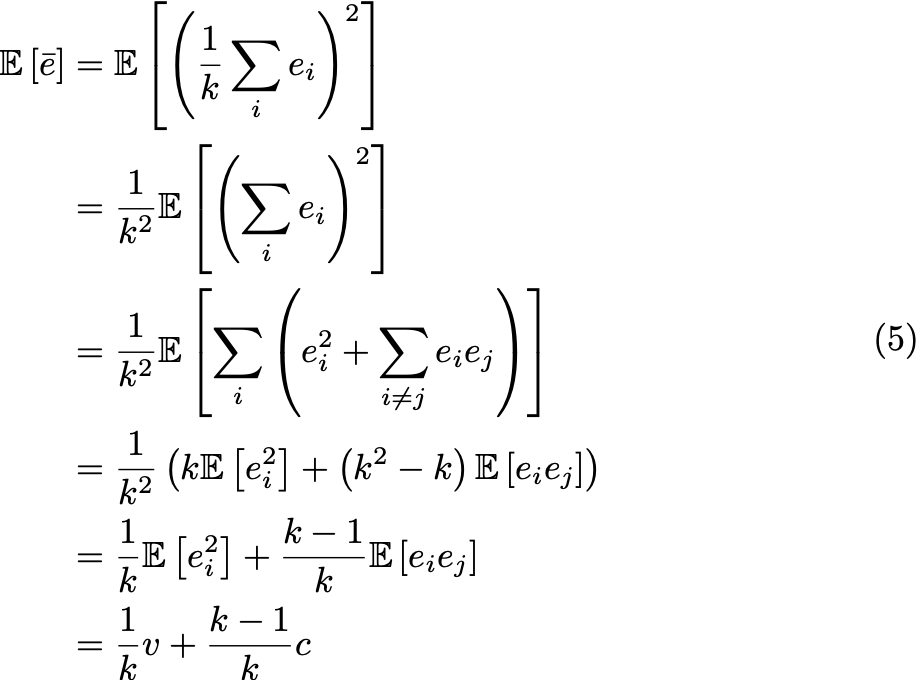

#### 모델이 서로 독립이 아닌 경우

개별 모델 간에 상관성이 커서 공분산과 분산이 같다면, c=v를 대입하여 배깅오차는 모델의 오차와 같은 분산을 가지기에 모델 간에 상관성이 높으면 배깅 시 오차가 줄지 않는다

Var(b) = v*(1/k) + v*(k-1/k) = v

#### 모델이 서로 독립인 경우

모델이 독립이면 공분산이 0어서 c=0이 되어 앙상블 오차는 모델 수에 비례해서 줄어드므로 개별 모델의 독립성 보장 시 모델 수에 비례해서 오차를 줄일 수 있게 된다.

Var(b) = v*(1/k) + 0(k-1/k) = v/k

## 드롭아웃

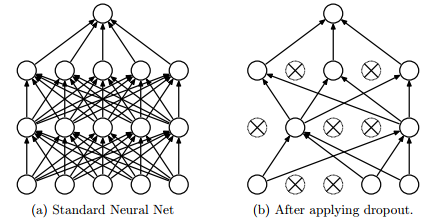

드롭아웃은 미니배치 실행시 뉴런을 랜덤하게 잘라낸 후에 새로운 모델을 생성하는 정규화 방식으로 하나의 신경망 모델에서 무한히 많은 모델을 생성하는 배깅과 비슷하고 계산 시간이 빨라서 다양한 모델에 쉽게 적용 또한 가능하다

#### 드롭아웃이 배깅보다 성능이 좋을까?

드롭아웃은 모델끼리 파라미터를 공유하기에 상관성이 생기게 되므로 독립성을 가지는 배깅보다 좋은 성능을 갖기는 어렵지만 실용성 부분에선 좋다고 평가를 받는다. 왜냐하면, 드롭아웃은 무수히 많은 모델의 평균으로 예측이 가능한 효과가 있어서 적은 자원으로도 좋은 효과를 볼 수 있다.

### 학습단계

드롭아웃은 미니배치 실행할 때마다 뉴런을 랜덤하게 잘라서 매번 다른 모델을 생성하는 것이라고 했는데, 뉴런을 드롭아웃 할 때는 뉴런의 0.5이상 유지가 되어야한다는 규칙이 있다. 그래서 보통 입력뉴런은 0.8, 은닉뉴런은 0.5정도로 지정한다.

#### 드롭아웃하면 어떤 모델이 생성될까

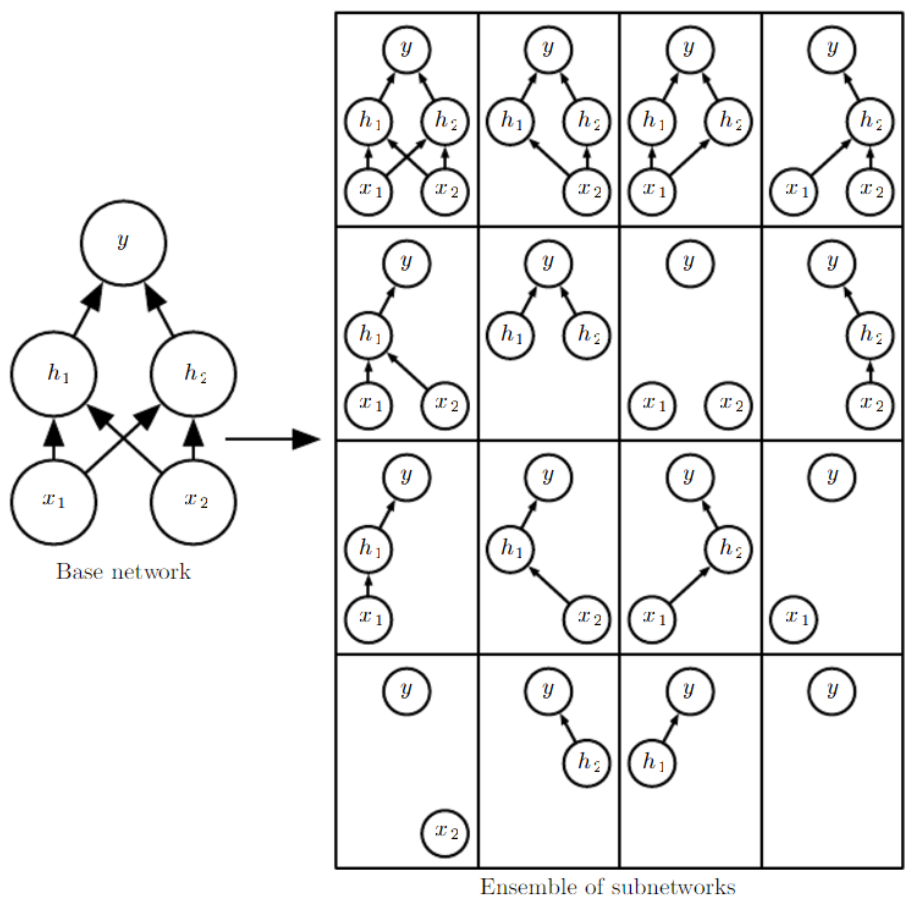


#### 이진 마스크를 활용한 뉴런의 드롭아웃

이진 마스크는 미니배치를 실행할 때마다 계층별로 생기는 것으로 뉴런별 드롭아웃 여부를 나타내고, 뉴런의 마스크 값이 1이면 유지되고 0이면 드롭아웃이됩니다. 1과0의 비율을 통해서 뉴런이 유지될 확률을 정하고, 계층의 출력에 이진마스크를 곱하면 드롭아웃이 실행된다. 

위의 부분을 수식적 관점으로 본다면, 한 계층에서 가중 합산과 활성함수를 실행한 결과를 a에 저정한 후에 계층별로 베르누이 분포를 따르면서 난수를 발생시켜 0 과 1을 갖는 이진마스크(r)를 생성합니다. 그리고 a * r을 하여 드롭아웃 적용

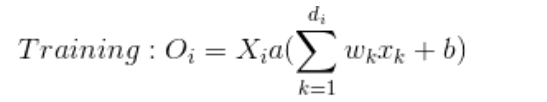


### 추론 단계

뉴런을 드롭아웃하지 않고 훈련 과정에서 얻어진 확률을 바탕으로 생성된 다양한 모델의 평균예측해야한다.

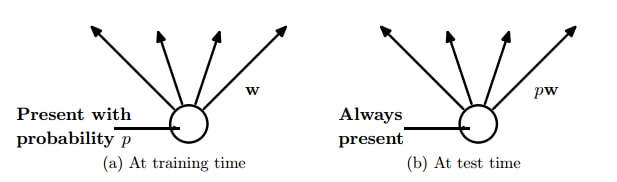

#### 무한히 많은 모델의 평균 계산

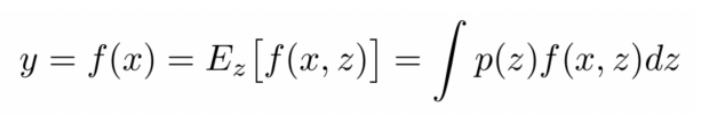

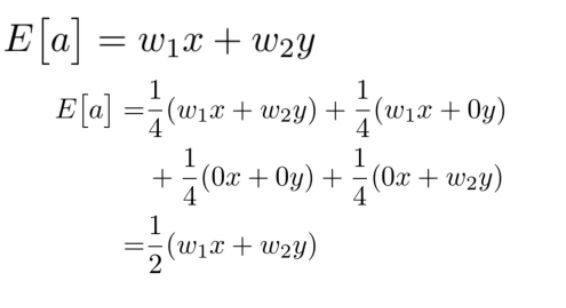

모델의 가중치를 p로 스케일링해서 모델의 평균을 계산하는 가중치 비례 추론 규칙을 따르고, 추론 시에는 각 계층의 출력에 뉴런 유지확률 p만 곱하면 된다.


#### 역드롭아웃

역드롭아웃은 p를 꼭 추론시점에 곱해야만 하나라는 관점에서 나온 것으로, 훈련 시점에서 나온 각 출력의 계층을 미리 p로 나누면 추론 코드를 그대로 사용할 수 있는 아이디어를 말한다.

*이미지의 q는 우리가 말하는 p와 같습니다

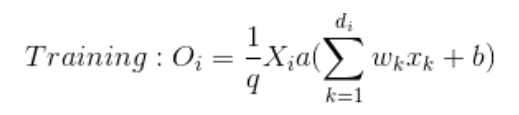


## 잡음 주입

데이터나 모델이 처음부터 확률로 정의가 된다면 더 좋게 추론을 할 수 있지만 그렇지 않다면 잡음을 넣어서 확률적 성질을 부여하면 다양성이 생기면서 정규화 효과가 생깁니다.
*잡음을 넣으면 변형된 데이터가 생성이 되어 특정한 분포를 따르게 됩니다.


### 잡음 주입 방식(정규화 기법 중 하나)

잡음 주입 방식은 확률적 성질을 부여하고 싶은 대상에 따라 다르게 적용이 되고 확률적 성질 부여하고 싶은 대상은 은 입력데이터, 은닉계층의 출력된 특징,모델 가중치, 레이블등을 의미합니다.

#### 입력데이터

대상이 입력 데이터일 경우 데이터 증강기법을 이용하면 되고 입력 데이터는 작은 분산을 갖는 잡음만 넣어도 가중치 감소와 동일한 정규화 효과를 얻게 된다.


#### 특징

대상이 은닉 계층에서 추출된 특징일 경우 데이터가 추상화된 상태에서 데이터 증강하는 것을 생각할 수 있고, 추상화된 데이터에 확률적 성질을 부여하기 때문에 객체와 같은 상대적 의미 단위로 데이터 증강이 일어나서 성능 향상이 크게 됩니다.

#### 모델 가중치

대상이 도멜 가중치일 경우 드롭아웃을 이용하면된다. 왜냐하면 드롭아웃에서 뉴런 제거 시 확률적으로 가중치를 조절하기 때문이고, 가중치에 잡음을 주입하는 것이 가중치의 불확실성과 연관이 있습니다.

베이지언 신경망은 가중치의 분포를 학습하면서 가중치의 불확실성을 표현합니다. 무슨 말이냐면, 가중치 분포의 분산이 크면 불확실성이 높고 작다면 작아지는 비례적 관계를 가집니다.

가중치에 잡음을 더하면 가중치가 조금씩 변하게 되어 그레디언트 크기가 작아지는 정규화 효과가 일어나서 학습이 진행되면 될수록 평평한 평지 위에 최소지점을 찾게 되어 새로운 데이터에 대한 일반화 성능이 향상됩니다.

#### 최적해가 평지 위면 좋은 이유


우리는 항상 최소 지점이 평지에 있으면 좋다고 배웠지만 그 이유는 인지하지 못하고 받아들였을 것입니다. 훈련된 모델이 테스트 데이터에 좋은 성능을 보이려면 당연히 손실이 가장 작아야하고 그 지점이 최소지점일 것입니다 평지일 경우 최소지점을 이동할 때 손실이 작아지지만 경사가 가파르면 조금만 이용해도 손실이 너무 커져버리기 때문에 완만한 평지 위가 이동하기 편하고 이동 시 손실함수의 급증을 피할 수 있기 때문에 좋다고 말하는 것이다.

### 소프트 레이블링

훈련 데이터의 레이블에 오차가 있을 시 레이블에 일정한 크기의 오차를 반영해주면 정확하게 예측이 가능하다.

#### 레이블이 부정확하다면?

이 경우, 분류 모델의 학습에서 타깃 클래스의 확률을 1 나머지를 0으로 설정하겠지만 레이블 오차가 있다면 모델이 정확하게 분류하지 못하기 때문에 일정량의 손실이 생겨 최적화가 되지 않게 된다

#### 레이블에 잡음 주입

레이블이 정확하지 않아 a만큼의 오차가 있을 때, 타깃 클래스의 확률은 a만큼 작게 만든 후 나머지 클래스들의 확률 a을 배분하여 확률을 부여하는 방식인 소프트 레이블링을 사용해야한다. 왜냐하면, 오차를 반영하여 학습한 모델은 성능이 좋아지기 때문입니다.

*다양한 상황을 예측할 수 있을 정도로 강한 모델이 되었기 때문입니다.

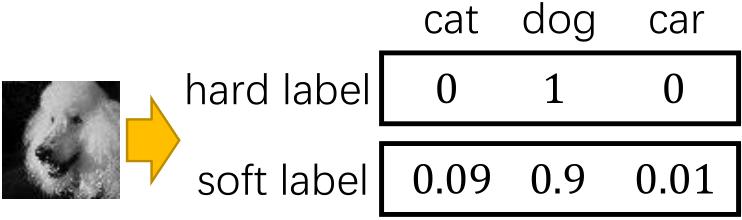

### Dropout과 Keras를 이용한 EarlyStopper callback

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7829 - accuracy: 0.7162 - val_loss: 0.4205 - val_accuracy: 0.8491
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4260 - accuracy: 0.8477 - val_loss: 0.3944 - val_accuracy: 0.8557
Epoch 3/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3761 - accuracy: 0.8642 - val_loss: 0.3680 - val_accuracy: 0.8700
Epoch 4/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3566 - accuracy: 0.8707 - val_loss: 0.3712 - val_accuracy: 0.8677
Epoch 5/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3356 - accuracy: 0.8780 - val_loss: 0.3897 - val_accuracy: 0.8586
Epoch 6/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3229 - accuracy: 0.8844 - val_loss: 0.3460 - val_accuracy: 0.8758
Epoch 7/50
1875/1875 [==============================] - 5s 2ms/step - los

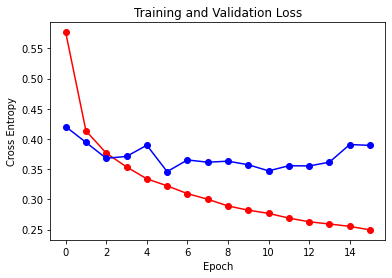

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

EPOCHS = 50

class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = tf.keras.layers.Flatten()                       # 28x28 = 784
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(64, activation='relu')
        self.dense4 = tf.keras.layers.Dense(128, activation='relu')
        self.dropout4 = tf.keras.layers.Dropout(0.5)
        self.dense5 = tf.keras.layers.Dense(10, activation='softmax')  # 10

    def call(self, x, training=False, mask=None):
        h = self.flatten(x)
        h = self.dense1(h)
        h = self.dense2(h)
        h = self.dense3(h)
        h = self.dense4(h)
        h = self.dropout4(h)
        return self.dense5(h)

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32).prefetch(2048)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32).prefetch(2048)

model = MyModel()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1) # loss감소가 10번 이상 미발생이면 stop

history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS, callbacks=[earlystopper])

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-')
plt.plot(val_loss, 'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()